## A classification model using SVM for Salary Data
In this notebook, we will built a classification model using Support Vector Machines (SVM) to predict whether an individual's salary is above or below $50,000 based on various features such as age, occupation, and more. We will perform exploratory data analysis to gain insights into the data and preprocess it for modeling. Next, we will train an SVM model using the training data. We'll evaluate the model's performance on the testing data, fine-tune its hyperparameters and perform additional preprocessing to improve its accuracy. Overall, the goal of this notebook is to demonstrate how to build a classification model using SVM and how to optimize its performance.

## Section 1. Importing Necessary Libraries

In [24]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.svm import SVC
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

## Section 2. Load Train and Test Dataset

In [ ]:
# TODO: Load the 'SalaryData_Train.csv' file into a pandas dataframe called train_data
train_data = pd.read_csv('https://raw.githubusercontent.com/MAminK80/ML_HW4/main/SalaryData_Train.csv')
# TODO: Load the 'SalaryData_Test.csv' file into a pandas dataframe called test_data
test_data = pd.read_csv('https://raw.githubusercontent.com/MAminK80/ML_HW4/main/SalaryData_Test.csv')
# TODO: Display the first 5 or 10 rows of the train_data dataframe
print(train_data.head().to_string())

   age          workclass   education  educationno        maritalstatus          occupation    relationship    race      sex  capitalgain  capitalloss  hoursperweek          native  Salary
0   39          State-gov   Bachelors           13        Never-married        Adm-clerical   Not-in-family   White     Male         2174            0            40   United-States   <=50K
1   50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse     Exec-managerial         Husband   White     Male            0            0            13   United-States   <=50K
2   38            Private     HS-grad            9             Divorced   Handlers-cleaners   Not-in-family   White     Male            0            0            40   United-States   <=50K
3   53            Private        11th            7   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male            0            0            40   United-States   <=50K
4   28            Private   Bachelors           13   Ma

## Section 3. EDA

In [ ]:
# TODO: Print the shape of the train_data dataframe
print(train_data.shape)
# TODO: Print the shape of the test_data dataframe
print(test_data.shape)
# TODO: Print the information about the train_data dataframe
print(train_data.info())
# TODO Display the summary statistics of the train_data dataframe
print(train_data.describe())
# TODO: Replace any NaN values in the train_data dataframe with 0
new_train = train_data.fillna(0, inplace=False)
# TODO: Print the number of NaN values in each column of the train_data dataframe
nan_values = train_data.isna().sum()
print(nan_values)

(30161, 14)
(15060, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB
None
                age   educationno   capitalgain   capitalloss  hoursperweek
count  30161.000000  30161.000000  30161.000000 

## Data Visualization

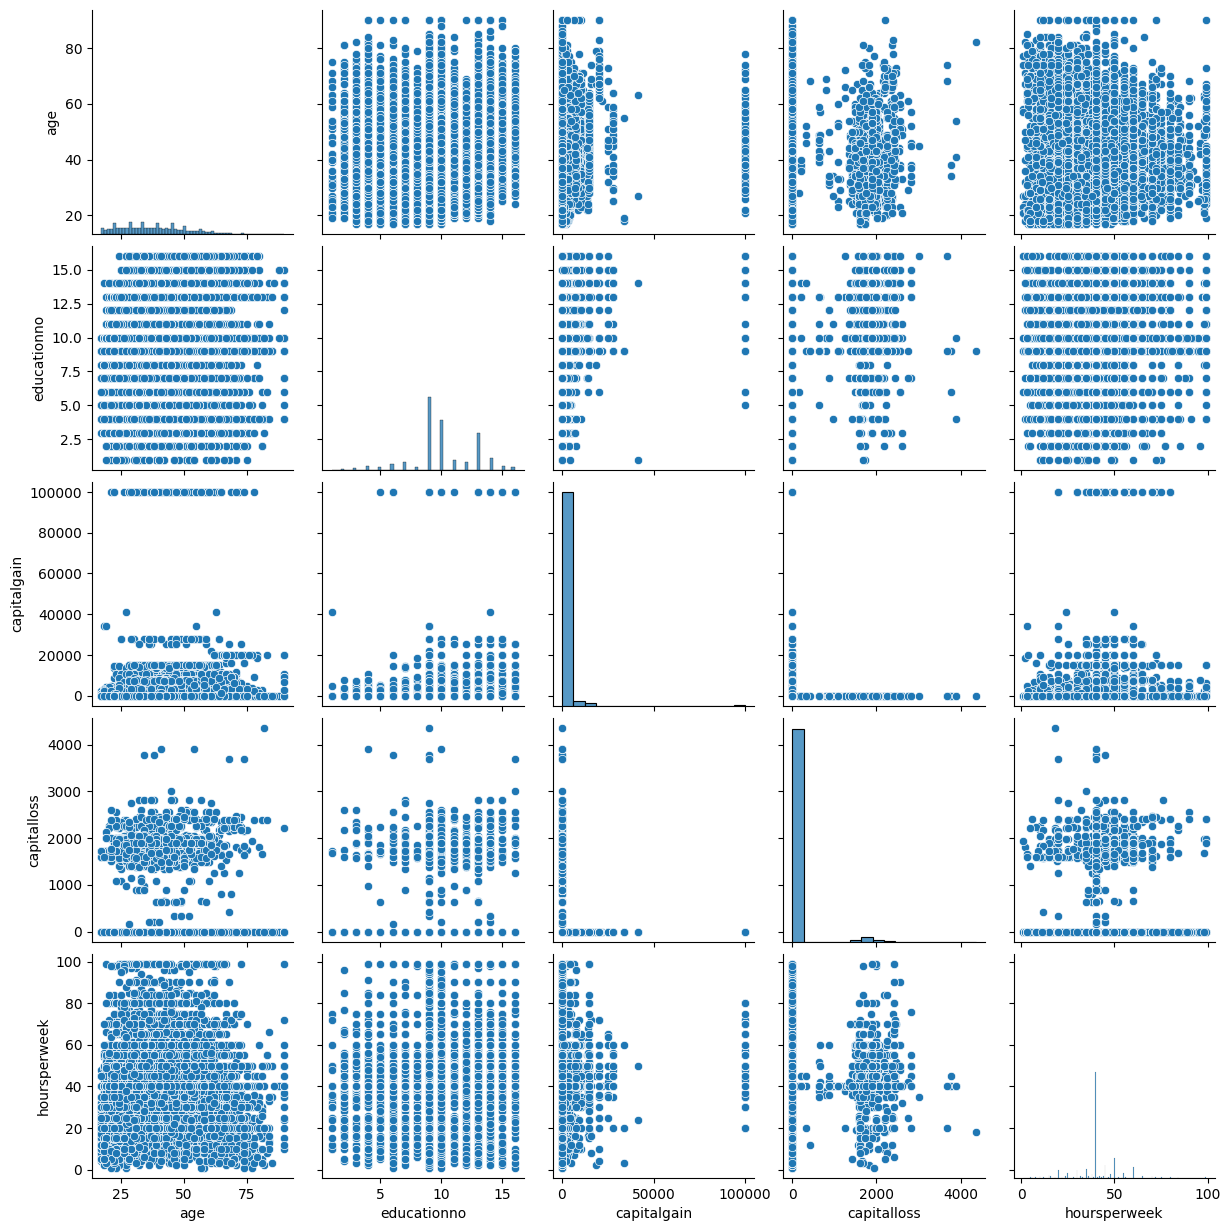

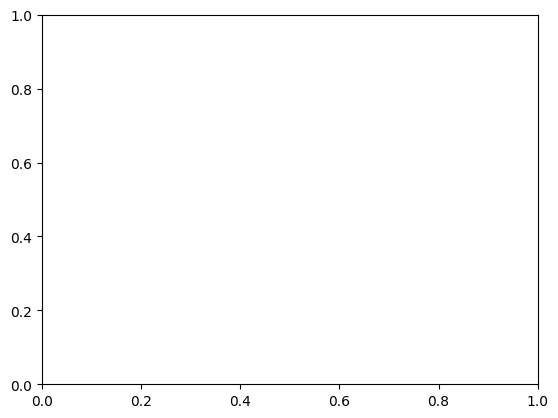

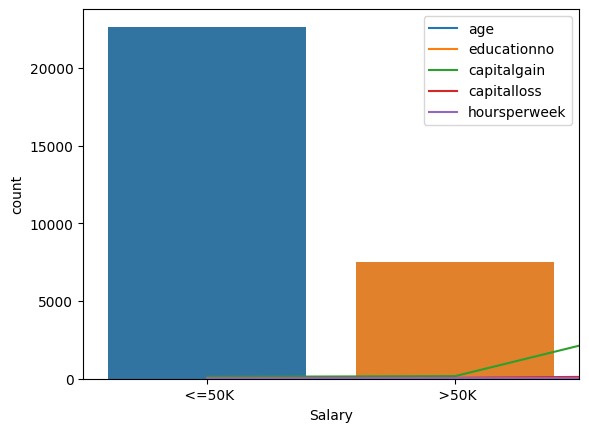

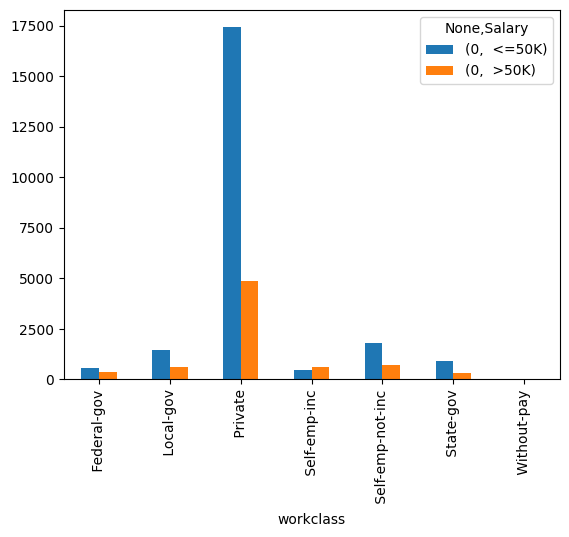

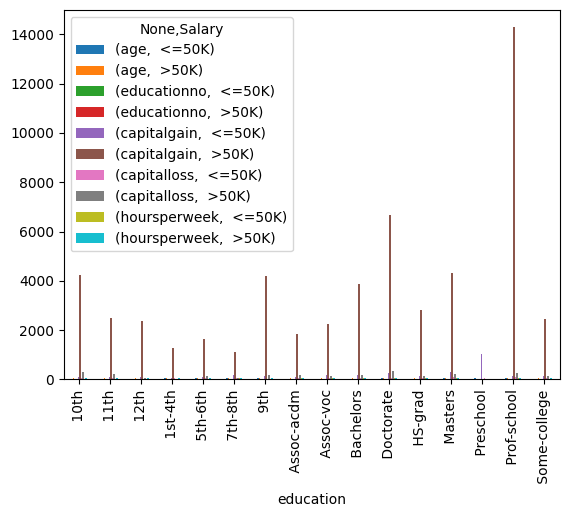

In [ ]:
# TODO: Display pairwise relationships between variables in the train_data dataframe
sns.pairplot(new_train)

# TODO: Plot the average count of males and females in each salary group using a bar plot
group_data = new_train.groupby(['Salary', 'sex']).mean().reset_index()
fig, ax = plt.subplots()
group_data.plot()
# TODO: Plot the count of each salary group in the train_data dataframe using a countplot
sns.countplot(x='Salary', data=new_train)
# TODO: Plot the count of each salary group in each workclass using a bar plot
grouped = new_train.groupby(['workclass', 'Salary']).size().reset_index()
pivoted = grouped.pivot(index='workclass', columns='Salary')
fig, ax = plt.subplots()
pivoted.plot(kind='bar', ax=ax)

# TODO: Plot the average count of each education level in each salary group using a bar plot
grouped = new_train.groupby(['education', 'Salary']).mean().reset_index()

pivoted = grouped.pivot(index='education', columns='Salary')
fig, ax = plt.subplots()
pivoted.plot(kind='bar', ax=ax)


# TODO: Plot the average count of each occupation in each salary group using a bar plot

# TODO: Plot the average count of each workclass in each salary group using a bar plot

# TODO: Plot the correlation between variables in the train_data dataframe using a heatmap
plt.show()

###  Outliers Detection

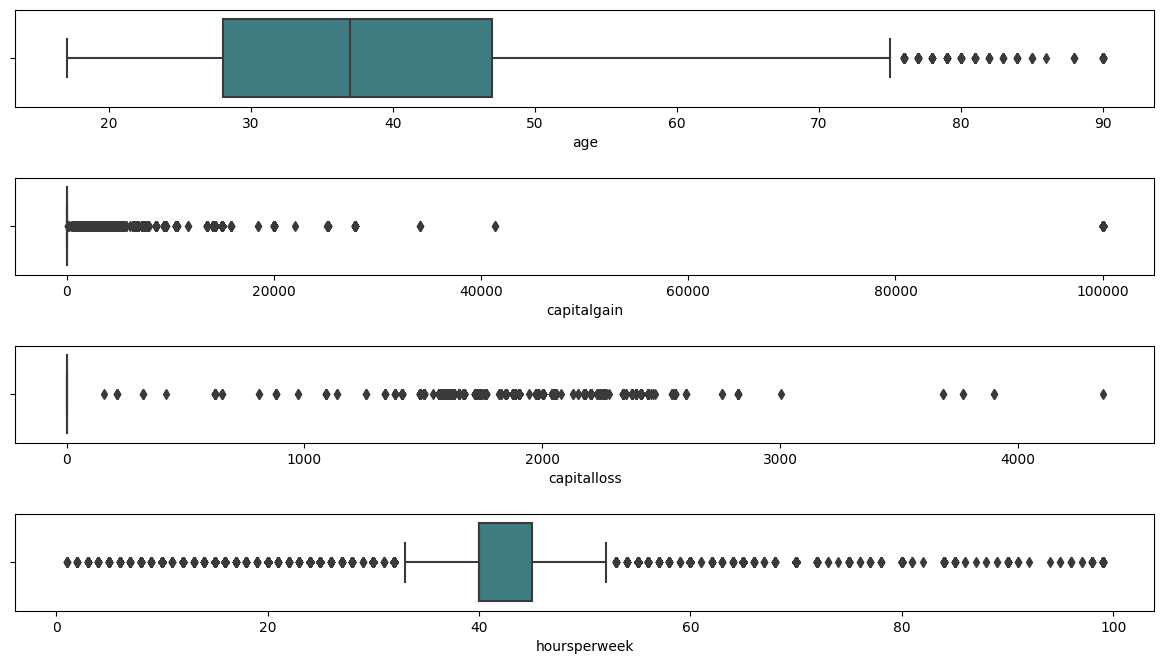

In [ ]:
outlier1 = train_data.copy()
fig, axes=plt.subplots(4,1,figsize=(12,7),sharex=False,sharey=False)
sns.boxplot(x='age',data=outlier1,palette='crest',ax=axes[0])
sns.boxplot(x='capitalgain',data=outlier1,palette='crest',ax=axes[1])
sns.boxplot(x='capitalloss',data=outlier1,palette='crest',ax=axes[2])
sns.boxplot(x='hoursperweek',data=outlier1,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

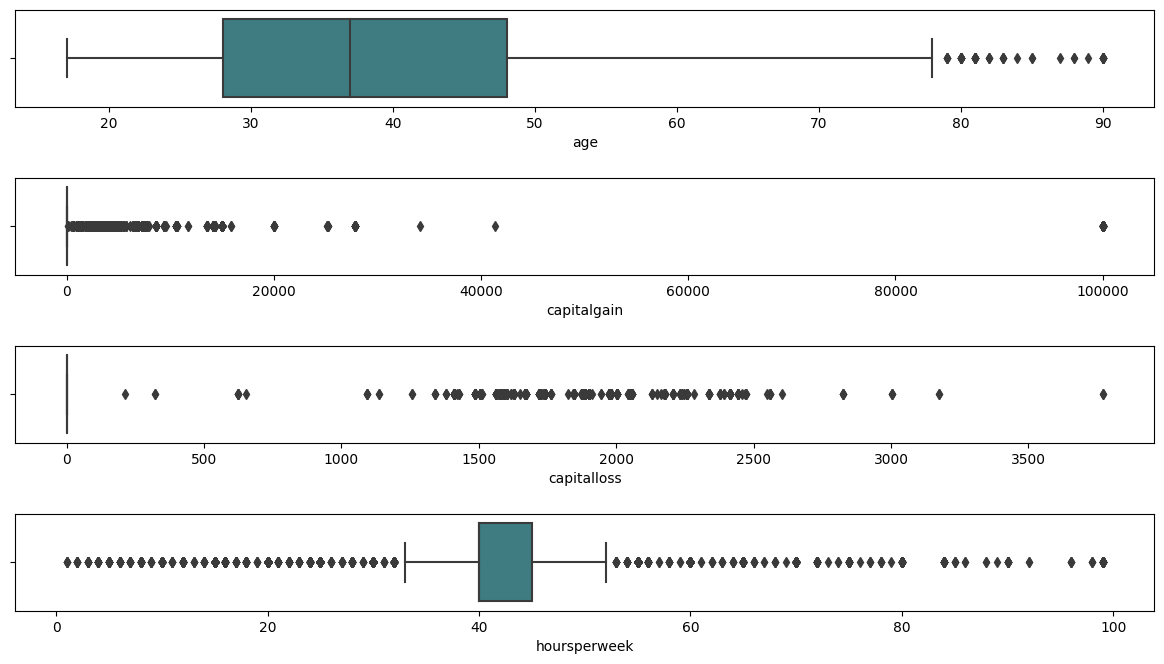

In [ ]:
outlier2 = test_data.copy()
fig, axes=plt.subplots(4,1,figsize=(12,7),sharex=False,sharey=False)
sns.boxplot(x='age',data=outlier2,palette='crest',ax=axes[0])
sns.boxplot(x='capitalgain',data=outlier2,palette='crest',ax=axes[1])
sns.boxplot(x='capitalloss',data=outlier2,palette='crest',ax=axes[2])
sns.boxplot(x='hoursperweek',data=outlier2,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

#### There are lot of outliers present in the dataframe but we can't drop them because they are present in a very large quantity and can be important for model building

## Section 4. Data Preprocessing

In [ ]:
# TODO: Create a LabelEncoder object
le = LabelEncoder()
# TODO: Use the LabelEncoder object to transform these columns of the train_data dataframe:

# workclass, education, maritalstatus, occupation, relationship, race, sex, native
for column in ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native']:
    new_train[column] = le.fit_transform(new_train[column])

# TODO: Display the modified train_data dataframe
#print(new_train.to_string())
#print(new_train['Salary'])

# TODO: Use a list comprehension to replace the values in the 'Salary' column of
# the train_data dataframe with 0 if the value is<=50K' and 1 if the value is '>50K'
new_train['Salary'] = [1 if cell == ' >50K' else cell for cell in new_train['Salary']]
new_train['Salary'] = [0 if cell == ' <=50K' else cell for cell in new_train['Salary']]
print(new_train['Salary'].head().to_string())
# TODO: Do the same preprocessing to test data
for column in ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native']:
    test_data[column] = le.fit_transform(test_data[column])
test_data['Salary'] = [1 if cell == '>50K' else cell for cell in test_data['Salary']]
test_data['Salary'] = [0 if cell == '<=50K' else cell for cell in test_data['Salary']]

0    0
1    0
2    0
3    0
4    0


## Section 5. Model Building

In [ ]:
# TODO: Create X_train by dropping the 'Salary' column from the train_data dataframe
X_train = new_train.drop('Salary', axis=1)
# TODO: Create y_train by selecting only the 'Salary' column from the train_data dataframe
y_train = new_train['Salary']
print(y_train.to_string())
# TODO: Create X_test by dropping the 'Salary' column from the test_data dataframe
X_test = test_data.drop('Salary', axis=1)
# TODO: Create y_test by selecting only the 'Salary' column from the test_data dataframe
y_test = test_data['Salary']
# TODO: Print the shape of X_train, y_train, X_test, and y_test dataframes
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
# TODO: Create a Support Vector Classifier object
svc = SVC()

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        1
8        1
9        1
10       1
11       1
12       0
13       0
14       0
15       0
16       0
17       0
18       1
19       1
20       0
21       0
22       0
23       0
24       1
25       0
26       0
27       0
28       0
29       0
30       0
31       0
32       0
33       0
34       0
35       0
36       0
37       0
38       0
39       0
40       0
41       0
42       1
43       0
44       0
45       0
46       0
47       0
48       1
49       1
50       0
51       1
52       0
53       0
54       0
55       0
56       0
57       0
58       1
59       0
60       0
61       0
62       1
63       1
64       0
65       0
66       1
67       0
68       0
69       0
70       0
71       0
72       0
73       0
74       0
75       0
76       0
77       1
78       0
79       1
80       0
81       0
82       1
83       0
84       0
85       0
86       1
87       0
88       1
89       1
90       0

## Section 6. Model Training | Testing | Evaluation - SVM Model

In [ ]:
# TODO: Train the svc model with X_train and y_train
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
svc.fit(X_train, y_train)
# TODO: Use the svc model to predict the values of y for X_test and store the result in y_pred
y_pred = svc.predict(X_test)
# TODO: Print the confusion matrix of y_test and y_pred
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)
# TODO: Print the classification report of y_test and y_pred
class_report = classification_report(y_test, y_pred)
print(class_report)
# TODO: Print the training accuracy of the svc model with X_train and y_train
acc_train = svc.score(X_train, y_train)
print(acc_train)
# TODO: Print the testing accuracy of the svc model with X_test and y_test
acc_test = svc.score(X_test, y_test)
print(acc_test)

[[10997   363]
 [ 2703   997]]
              precision    recall  f1-score   support

           0       0.80      0.97      0.88     11360
           1       0.73      0.27      0.39      3700

    accuracy                           0.80     15060
   macro avg       0.77      0.62      0.64     15060
weighted avg       0.79      0.80      0.76     15060

0.7960279831570571
0.7964143426294821


##Section 7. Handling Imbalance Data

In [ ]:
# TODO: Print the count of each unique value in the 'Salary' column of the train_data dataframe
print(new_train['Salary'].value_counts())
# TODO: Create a SMOTE object
smote = SMOTE(sampling_strategy='auto', random_state=10)
# TODO: Use  the SMOTE object to resample the X_train and y_train dataframes
# and store the result in X_resampled and y_resampled, respectively
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
# TODO: Display the resampled X_resampled dataframe
X_resampled_df = pd.DataFrame(X_resampled, columns=X_train.columns)
print(X_resampled_df.head(10).to_string())
# TODO: Display the resampled y_resampled dataframe
y_resampled_df = pd.DataFrame(y_resampled)
print(y_resampled_df.head(10).to_string())
# TODO: Print the count of each unique value in the resampled y_resampled dataframe
print(y_resampled_df.head(10).value_counts())


0    22653
1     7508
Name: Salary, dtype: int64
   age  workclass  education  educationno  maritalstatus  occupation  relationship  race  sex  capitalgain  capitalloss  hoursperweek  native
0   39          5          9           13              4           0             1     4    1         2174            0            40      37
1   50          4          9           13              2           3             0     4    1            0            0            13      37
2   38          2         11            9              0           5             1     4    1            0            0            40      37
3   53          2          1            7              2           5             0     2    1            0            0            40      37
4   28          2          9           13              2           9             5     2    0            0            0            40       4
5   37          2         12           14              2           3             5     4    0      

* 0.0001 < gamma < 10
* 0.1 < C < 100 -- gamma--decision boundary shape (Larger gamma value-overfitting of the model)
* C parameter adds a penalty for each misclassified data point

In [ ]:
# TODO: Create a Support Vector Classifier object,
# try to change it's parameters for better accuracy
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

svc = SVC()
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'scale'], 'kernel': ['linear', 'rbf']}

# Create a GridSearchCV object to find the best parameters
grid_search = GridSearchCV(svc, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy score
print("Best parameters:", grid_search.best_params_)
# TODO: Train the model with resampled X and y dataframes as arguments

# TODO: Use the model to predict the values of y for X_test and store the result in y_pred

# TODO: Print the confusion matrix of y_test and y_pred

# TODO: Print the classification report of y_test and y_pred

# TODO: Print the training accuracy of the model with resampled X and y dataframes as arguments

# TODO: Print the testing accuracy of the model with X_test and y_test as arguments


## Section 8. Feature Selection

In [ ]:
def select_features(X_train, y_train, X_test):

    # TODO: Create a SelectKBest object with chi2 as the score function
    f_best = SelectKBest(chi2, k=X_train.shape[1])
    # TODO: Fit the X_train and y_train dataframes using the SelectKBest object
    f_best.fit(X_train, y_train)
    # TODO: Transform the X_train dataframe using the SelectKBest object and store the result in X_train_fs
    X_train_fs = f_best.transform(X_train)
    # TODO: Transform the X_test dataframe using the SelectKBest object and store the result in X_test_fs
    X_test_fs = f_best.transform(X_test)
    # TODO: Return the X_train_fs, X_test_fs, and SelectKBest object
    return X_train_fs, X_test_fs, f_best

[7.92714625e+03 4.06126126e+00 2.64815807e+02 2.17831744e+03
 9.82227659e+02 2.18597378e+02 3.43538273e+03 2.93395354e+01
 4.59219298e+02 7.41246624e+07 1.25878577e+06 5.56919407e+03
 1.67073200e+01]


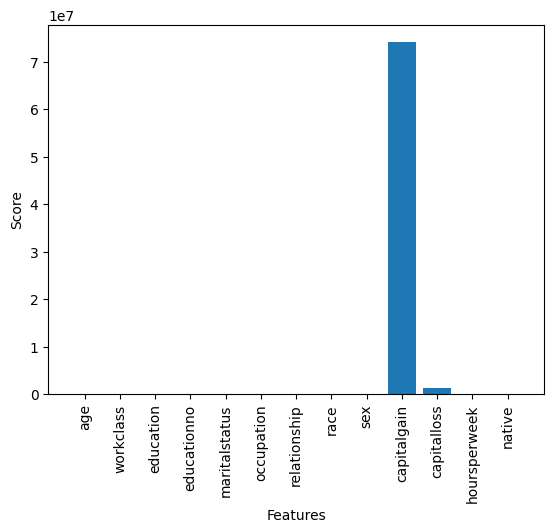

capitalgain 74124662.37626876
capitalloss 1258785.7692991274
age 7927.146247041541
hoursperweek 5569.1940663280375
relationship 3435.382730752923
educationno 2178.3174384441327
maritalstatus 982.2276592748894
sex 459.2192975768097


In [25]:
# TODO: Call the select_features() function and store the result in X_fs, X_test_fs, and fs
X_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# TODO: print the corresponding score of each feature using scores_ attribute of the fs object
print(fs.scores_)
# TODO: Create a bar plot of the scores
plt.bar(range(len(fs.scores_)), fs.scores_)
# TODO: Display the bar plot
plt.xticks(range(len(fs.scores_)), X_train.columns, rotation=90)
plt.xlabel('Features')
plt.ylabel('Score')
plt.show()
# TODO Pick out the most relevant features
sorted_scores = sorted(zip(X_train.columns, fs.scores_), key=lambda x: x[1], reverse=True)
for feature, score in sorted_scores[ : 8]:
    print(feature, score)

In [26]:
# TODO: Create a copy of the train_data dataframe called train_data_copy
train_data_copy = new_train.copy()
# TODO: Drop the columns with irrelevant features from the train_data_copy dataframe
top_features = [feature for feature, score in sorted_scores[:8]]
train_data_copy.drop(columns=[col for col in train_data_copy.columns if col not in top_features], inplace=True)
# TODO: Display the train_data_copy dataframe
print(train_data_copy.to_string())
# TODO: Do the same to the test_data
test_data_copy = test_data.copy()
test_data_copy.drop(columns=[col for col in test_data_copy.columns if col not in top_features], inplace=True)
print(test_data_copy.to_string())

       age  educationno  maritalstatus  relationship  sex  capitalgain  capitalloss  hoursperweek
0       39           13              4             1    1         2174            0            40
1       50           13              2             0    1            0            0            13
2       38            9              0             1    1            0            0            40
3       53            7              2             0    1            0            0            40
4       28           13              2             5    0            0            0            40
5       37           14              2             5    0            0            0            40
6       49            5              3             1    0            0            0            16
7       52            9              2             0    1            0            0            45
8       31           14              4             1    0        14084            0            50
9       42          

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Section 9. Model Training with Highly Relevant Features


In [27]:
# TODO: Create X_train by dropping the 'Salary' column from the train_data dataframe
X_train = new_train.drop('Salary', axis=1)
# TODO: Create y_train by selecting only the 'Salary' column from the train_data dataframe
y_train = new_train['Salary']
print(y_train.to_string())
# TODO: Create X_test by dropping the 'Salary' column from the test_data dataframe
X_test = test_data.drop('Salary', axis=1)
# TODO: Create y_test by selecting only the 'Salary' column from the test_data dataframe
y_test = test_data['Salary']
# TODO: Repeat all the steps in Section 6 with the new dataset that has irrelevant features removed
# TODO: Train the svc model with X_train and y_train
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
svc.fit(X_train, y_train)
# TODO: Use the svc model to predict the values of y for X_test and store the result in y_pred
y_pred = svc.predict(X_test)
# TODO: Print the confusion matrix of y_test and y_pred
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)
# TODO: Print the classification report of y_test and y_pred
class_report = classification_report(y_test, y_pred)
print(class_report)
# TODO: Print the training accuracy of the svc model with X_train and y_train
acc_train = svc.score(X_train, y_train)
print(acc_train)
# TODO: Print the testing accuracy of the svc model with X_test and y_test
acc_test = svc.score(X_test, y_test)
print(acc_test)

Streaming output truncated to the last 5000 lines.
25174    0
25175    1
25176    1
25177    0
25178    0
25179    0
25180    0
25181    0
25182    0
25183    0
25184    0
25185    0
25186    0
25187    0
25188    1
25189    0
25190    0
25191    0
25192    0
25193    0
25194    1
25195    0
25196    0
25197    0
25198    1
25199    0
25200    0
25201    0
25202    0
25203    0
25204    0
25205    0
25206    0
25207    0
25208    0
25209    0
25210    0
25211    0
25212    0
25213    0
25214    0
25215    1
25216    0
25217    1
25218    1
25219    1
25220    0
25221    1
25222    1
25223    1
25224    0
25225    1
25226    1
25227    0
25228    0
25229    0
25230    1
25231    0
25232    0
25233    0
25234    0
25235    0
25236    1
25237    0
25238    0
25239    1
25240    0
25241    0
25242    0
25243    0
25244    1
25245    0
25246    0
25247    0
25248    0
25249    1
25250    0
25251    1
25252    0
25253    0
25254    0
25255    0
25256    0
25257    0
25258    1
25259    0
252